In [1]:
import yfinance as yf

In [18]:
volitile = yf.download("RIVN", start='2019-03-16', end='2022-03-17')
spy=yf.download("SPY",start='2021-03-16', end='2022-03-17')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [19]:
volitile["Open"]

Ticker,RIVN
Date,
2021-11-10,106.750000
2021-11-11,114.625000
2021-11-12,128.645004
2021-11-15,130.800003
2021-11-16,163.800003
...,...
2022-03-10,44.105000
2022-03-11,38.320000
2022-03-14,37.740002


In [20]:
spy

Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2021-03-16,373.912567,375.725873,373.128667,375.008119,73722500
2021-03-17,375.187531,375.999734,371.447534,372.609204,97959300
2021-03-18,369.728699,374.677546,369.039248,372.562013,115349100
2021-03-19,369.044525,371.024862,366.836761,369.423532,113624500
2021-03-22,371.991425,373.393782,369.508896,369.565746,73778600
...,...,...,...,...,...
2022-03-10,407.196075,408.105234,402.372649,404.363253,93972700
2022-03-11,402.018585,410.344708,401.501782,409.722646,95636300


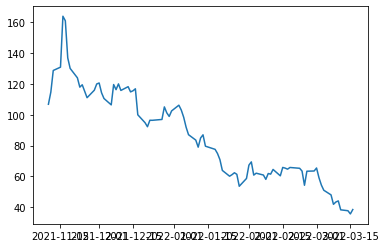

In [23]:
import matplotlib.pyplot as plt

plt.plot(volitile["Open"])